In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or encoding='ISO-8859-1'
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
920,ham,When u wana see it then,NaN,NaN,NaN
113,spam,GENT! We are trying to contact you. Last weeke...,NaN,NaN,NaN
4324,ham,Am only searching for good dual sim mobile pa.,NaN,NaN,NaN
3773,ham,Ok... But bag again..,NaN,NaN,NaN
2305,ham,Still in the area of the restaurant. Ill try t...,NaN,NaN,NaN


In [168]:
df.shape

(5572, 5)

# Process
1. Data cleaning 
2. EDA
3. Text Preprocessing
4. Model Building 
5. Evaluation
6. Improvements
7. Website
8. Deploy

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop last 3 columns

In [170]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [171]:
df.sample(5)

,v1,v2
1243,ham,No shoot me. I'm in the docs waiting room. :/
5205,spam,Had your mobile 11mths ? Update for FREE to Or...
2730,ham,I havent lei.. Next mon can?
228,ham,Life is more strict than teacher... Bcoz Teach...
412,ham,Okies... I'll go yan jiu too... We can skip ar...


In [172]:
# rename the columns
df.rename(columns={'v1':'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
1409,ham,Where at were hungry too
4153,ham,Haf u eaten? Wat time u wan me 2 come?
4041,ham,What time do u get out?
2835,ham,Nice.nice.how is it working?
4947,spam,"Hi this is Amy, we will be sending you a free ..."


In [173]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [174]:
# missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [175]:
# check for duplicates
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [176]:
df.shape

(5169, 2)

# EDA

In [177]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [178]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

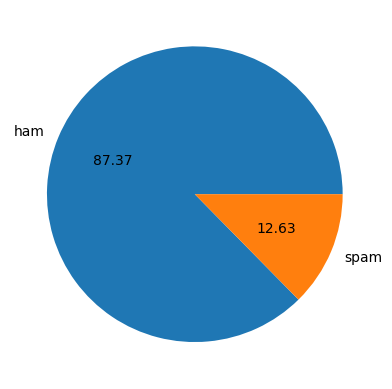

In [179]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [180]:
# Data is imbalanced

In [181]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [182]:
# length of each messages, that is no of characters
df['num_characters'] = df['text'].apply(len)

In [183]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [184]:
# num of words 
import nltk
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [185]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [186]:
# num of sentences in the text
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [187]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [188]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [189]:
# ham message describe
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [190]:
# spam messages describe
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

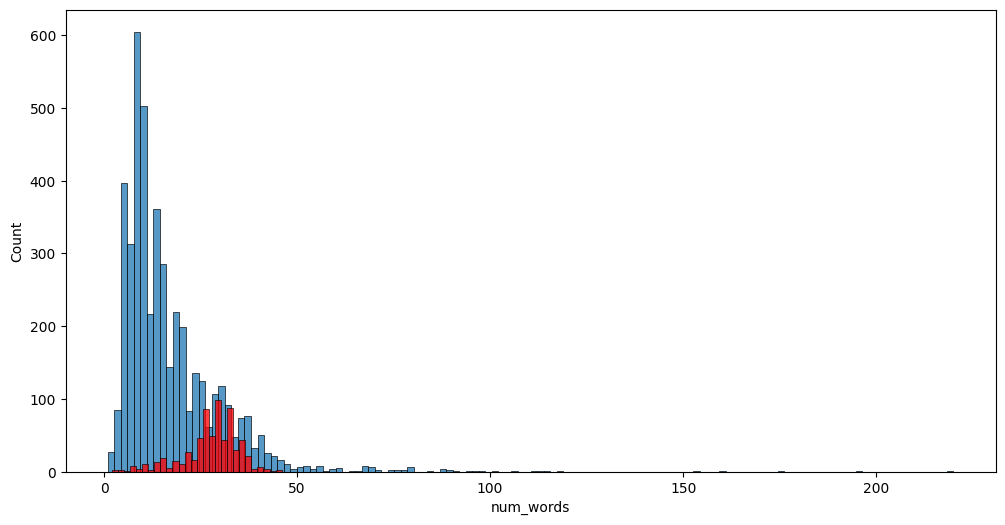

In [191]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

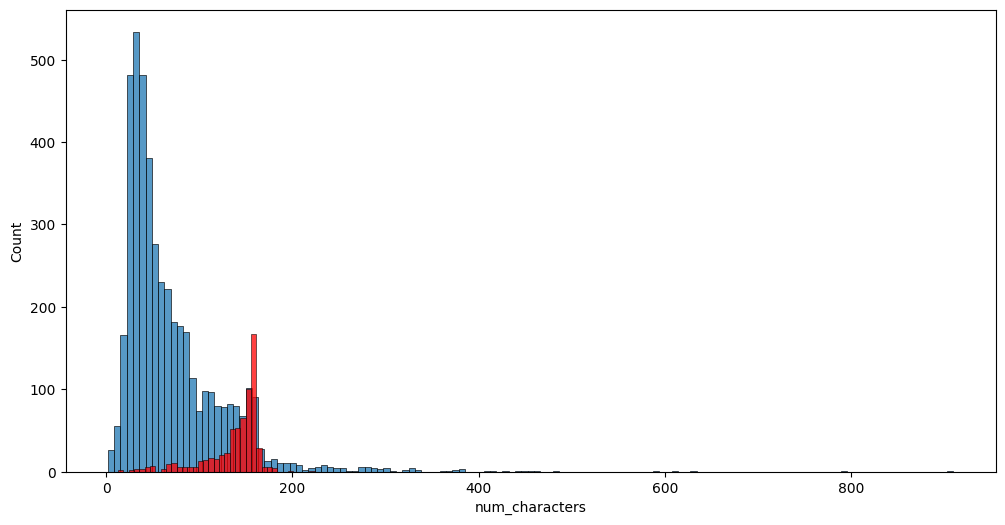

In [192]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

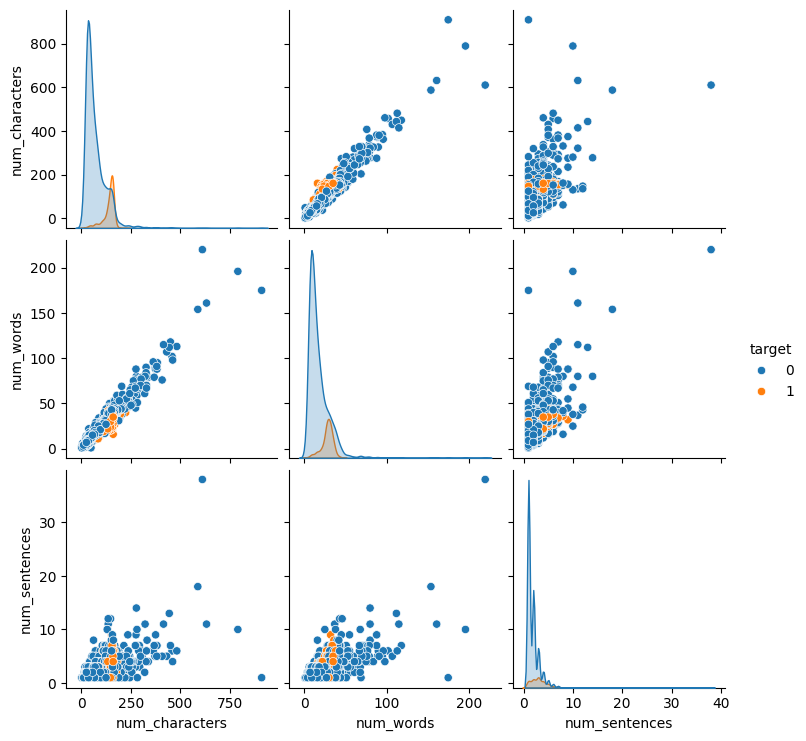

In [193]:
sns.pairplot(df, hue='target')

<Axes: >

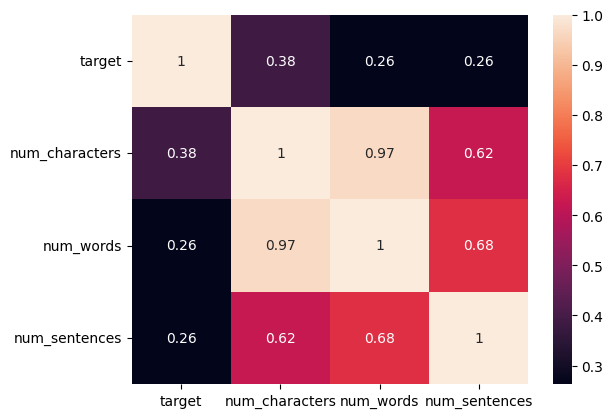

In [194]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# 3. Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and Punctuations
5. Stemming

In [195]:
# removing 3 part 
from nltk.corpus import stopwords
stopwords.words('english')

# removing 4 part 
import string
string.punctuation

# removing 5 part 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [196]:
# Not Efficient code
# def transform_text(text):
#   text = text.lower()
#   text = nltk.word_tokenize(text)

#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)

#   text = y[:]
#   y.clear()

#   for i in text:
#     if i not in stopwords.words("english") and i not in string.punctuation:
#       y.append(i)
    
#   text = y[:]
#   y.clear()

#   for i in text:
#     y.append(ps.stem(i))

#   return " ".join(y)

In [197]:
# Efficient Code for doing the same Operations
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
stopwords_set = set(stopwords.words("english"))

def transform_text(text):
    # Lowercase and tokenize in one step using regex (faster)
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords and punctuation, and apply stemming
    filtered = [ps.stem(word) for word in tokens if word not in stopwords_set]

    return " ".join(filtered)


In [198]:
transform_text("hi How are You Ibrahim !!, I wil give 100$, easy free money, high returns, You will be Loving the Profits rate")

'hi ibrahim wil give 100 easi free money high return love profit rate'

In [199]:
# now applying the transformation to our entire text
df['transformed_text'] = df['text'].apply(transform_text)

In [200]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [201]:
# mostly used  words
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

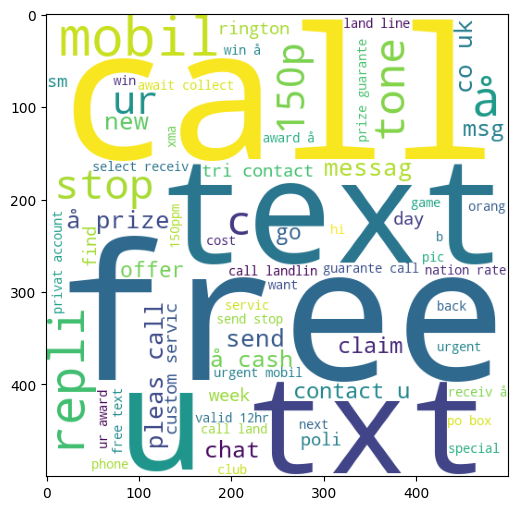

In [202]:
# mostly used spam words 
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

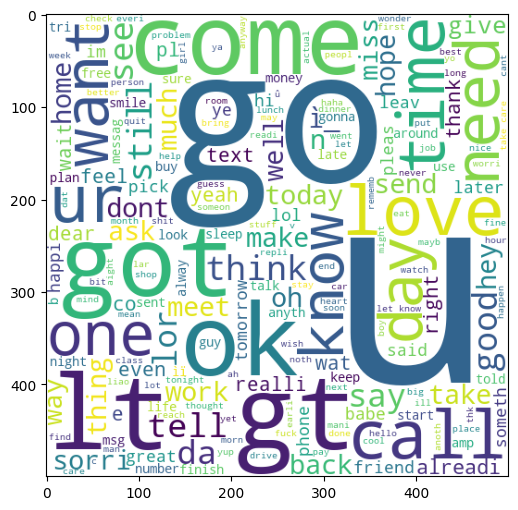

In [203]:
# mostly used ham words (non spam)
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [204]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [205]:
# spam top 30 words
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
  

In [206]:
len(spam_corpus)

11996

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'å'),
  Text(2, 0, 'free'),
  Text(3, 0, '2'),
  Text(4, 0, 'u'),
  Text(5, 0, 'txt'),
  Text(6, 0, 'text'),
  Text(7, 0, 'ur'),
  Text(8, 0, 'mobil'),
  Text(9, 0, '4'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'claim'),
  Text(13, 0, '1'),
  Text(14, 0, 'prize'),
  Text(15, 0, 'www'),
  Text(16, 0, 'get'),
  Text(17, 0, 'min'),
  Text(18, 0, 'tone'),
  Text(19, 0, 'cash'),
  Text(20, 0, 'servic'),
  Text(21, 0, '150p'),
  Text(22, 0, 'new'),
  Text(23, 0, 'uk'),
  Text(24, 0, 'send'),
  Text(25, 0, 'nokia'),
  Text(26, 0, 'urgent'),
  Text(27, 0, 'msg'),
  Text(28, 0, 'contact'),
  Text(29, 0, 'week')])

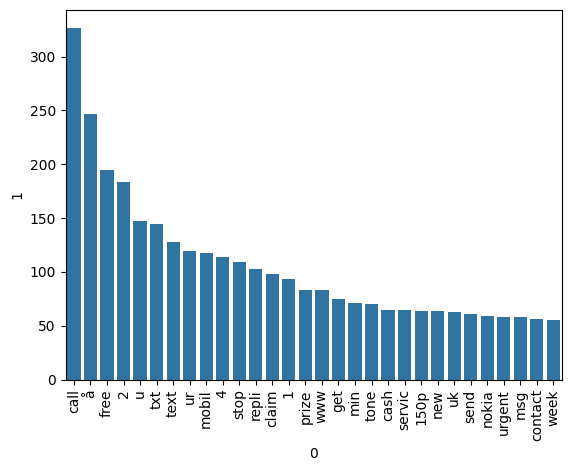

In [207]:
from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
           

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'ok'),
  Text(8, 0, 'call'),
  Text(9, 0, 'like'),
  Text(10, 0, 'know'),
  Text(11, 0, 'got'),
  Text(12, 0, 'love'),
  Text(13, 0, 'time'),
  Text(14, 0, 'good'),
  Text(15, 0, 'day'),
  Text(16, 0, 'want'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'need'),
  Text(19, 0, '4'),
  Text(20, 0, 'one'),
  Text(21, 0, 'lor'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'take'),
  Text(25, 0, 'see'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'k'),
  Text(29, 0, 'tell')])

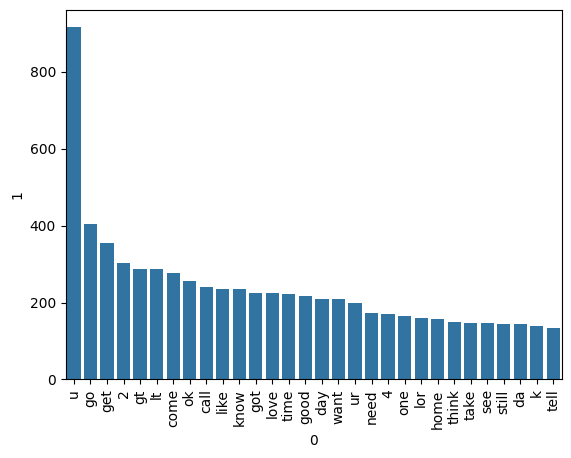

In [208]:
# ham top 30 words
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [209]:
# df.to_csv('transformed_data.csv', index=False)

# Model Building

In [210]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [211]:
# X =cv.fit_transform(df['transformed_text']).toarray()
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [212]:
X.shape

(5169, 3000)

In [213]:
y = df['target'].values

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [216]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [217]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [218]:
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_predict1))
print(precision_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))

0.8820116054158608
0.536036036036036
[[793 103]
 [ 19 119]]


In [219]:
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(precision_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))

0.9748549323017408
1.0
[[896   0]
 [ 26 112]]


In [220]:
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(precision_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))

0.9893617021276596
1.0
[[896   0]
 [ 11 127]]


In [221]:
# using tfidf we used it.
# tfidf --> MNB

In [222]:
# using various Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [223]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [224]:
clfs = {
    'SVC'      : svc,
    'KN'       : knc,
    'NB'       : mnb,
    'DT'       : dtc,
    'LR'       : lrc,
    'RF'       : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC'      : etc,
    'GBDT'     : gbdt,
    'xgb'      : xgb
}


In [225]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score( y_test, y_pred)
  precision = precision_score( y_test, y_pred)
  return accuracy,precision

In [226]:
# example
train_classifier(svc, X_train=X_train ,y_train=y_train, X_test=X_test, y_test=y_test)

(0.97678916827853, 0.975)

In [227]:
accuracy_scores =[]
precision_scores =[]

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test, y_test)
  print("\nFor ", name)
  print("Accuracy: ", current_accuracy)
  print("Precision: ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)



For  SVC
Accuracy:  0.97678916827853
Precision:  0.975

For  KN
Accuracy:  0.9042553191489362
Precision:  1.0

For  NB
Accuracy:  0.9748549323017408
Precision:  1.0

For  DT
Accuracy:  0.9332688588007737
Precision:  0.822429906542056

For  LR
Accuracy:  0.9593810444874274
Precision:  0.9615384615384616

For  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829

For  AdaBoost
Accuracy:  0.9226305609284333
Precision:  0.8372093023255814

For  BgC
Accuracy:  0.9574468085106383
Precision:  0.8405797101449275

For  ETC
Accuracy:  0.9806576402321083
Precision:  0.9758064516129032

For  GBDT
Accuracy:  0.9487427466150871
Precision:  0.9473684210526315

For  xgb
Accuracy:  0.97678916827853
Precision:  0.9596774193548387


In [228]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy',ascending=False)

performance_df

,Algorithms,Accuracy,Precision
8,ETC,0.980658,0.975806
10,xgb,0.976789,0.959677
0,SVC,0.976789,0.975000
5,RF,0.975822,0.982906
2,NB,0.974855,1.000000
4,LR,0.959381,0.961538
7,BgC,0.957447,0.840580
9,GBDT,0.948743,0.947368
3,DT,0.933269,0.822430
6,AdaBoost,0.922631,0.837209


In [229]:
# performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

# sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation= 'vertical')
# plt.show()

In [230]:
# increasing the performance of the model 
# by making in the tfidf max_features=3000 (did try and error for values like 1000, 1500, 2000,etc) setting
# by scaling, not worked (tried)

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

voting.fit(X_train, y_train)
